In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from . import color_palette
import starfile


ImportError: attempted relative import with no known parent package

In [ ]:
input_postprocess_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/PostProcess/job081/postprocess.star")
data = starfile.read(input_postprocess_star)

data_general = data["general"]
final_resolution = data_general["rlnFinalResolution"].values[0]
print(f"Final resolution: {final_resolution:.2f} Å")
randomise_from = data_general["rlnRandomiseFrom"].values[0]
print(f"Randomise from: {randomise_from:.2f} Å")

fsc_data = data["fsc"][["rlnResolution","rlnFourierShellCorrelationCorrected","rlnFourierShellCorrelationUnmaskedMaps","rlnFourierShellCorrelationMaskedMaps","rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps"]]
data = fsc_data.rename(columns={"rlnFourierShellCorrelationCorrected": "Corrected", "rlnFourierShellCorrelationUnmaskedMaps": "Unmasked", "rlnFourierShellCorrelationMaskedMaps": "Masked", "rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps": "PhaseRandomized"},)

pixel_size = 1.0825
binning = 1
data["rlnResolution"] = data["rlnResolution"] * binning
data.set_index("rlnResolution", inplace=True)

Final resolution: 18.01 Å
Randomise from: 37.53 Å


- **rlnFourierShellCorrelationCorrected** = Final FSC value: i.e. after correction based on masking of randomized-phases maps
- **rlnFourierShellCorrelationParticleMaskFraction** = CisTEM-like correction of unmasked FSCs, based on fraction of white pixels in solvent mask
- **rlnFourierShellCorrelationUnmaskedMaps** = FSC value before masking of the original maps
- **rlnFourierShellCorrelationMaskedMaps** = FSC value after masking of the original maps
- **rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps** = FSC value after masking of the randomized-phases maps

[(0.0, 0.1), (-0.05, 1.05)]

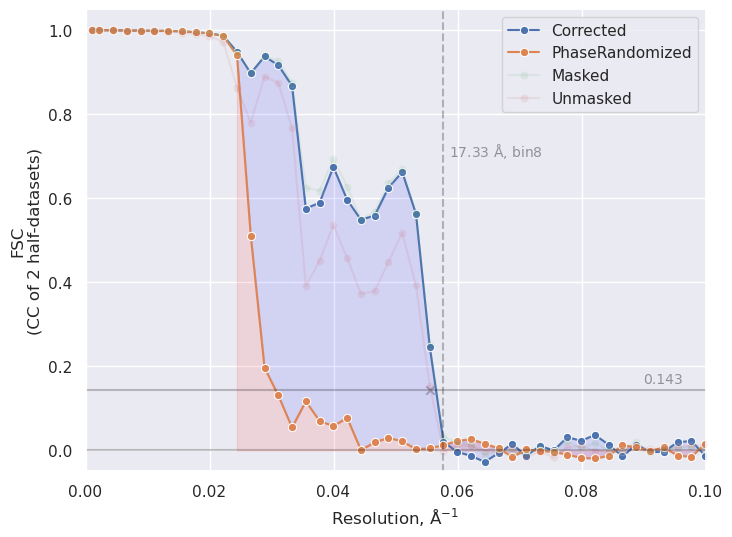

In [3]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(8, 6))
l1 = sns.lineplot(
    data=data,
    x="rlnResolution",
    y="Corrected",
    marker="o",
    label="Corrected",
)
l2 = sns.lineplot(
    data=data,
    x="rlnResolution",
    y="PhaseRandomized",
    marker="o",
    label="PhaseRandomized",
)
l3 = sns.lineplot(
    data=data,
    x="rlnResolution",
    y="Masked",
    marker="o",
    alpha=0.1,
    label="Masked",

)
l4 = sns.lineplot(
    data=data,
    x="rlnResolution",
    y="Unmasked",
    marker="o",
    alpha=0.1,
    label="Unmasked",
)
ax.legend()

alpha = 0.25
font_size = 10

ax.scatter(1/final_resolution, 0.143, marker="x", color="black", alpha=alpha)
ax.hlines(0, 0, 0.1, colors="k", linestyles="-", alpha=alpha)
ax.hlines(0.143, 0, 0.1, colors="k", linestyles="-", alpha=alpha)
ax.annotate(xy=(0.09, 0.16), text="0.143", alpha=alpha+0.2, fontsize=font_size)
resolution = 17.33 # Angstroms
ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin8", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
resolution = 8.66 # Angstroms
ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin4", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)
resolution = 6.495 # Angstroms
ax.vlines(1/resolution, -1,2, linestyles="dashed", colors="black", alpha=alpha)
ax.annotate(f"{resolution} $\mathrm{{\AA}}$, bin3", (1/resolution+0.001, 0.7), xycoords="data", alpha=alpha+0.2, fontsize=font_size)

resolution = 1/randomise_from
start_index = np.where(data.index > resolution)[0][0]

ax.fill_between(
    data.index[start_index-1:],
    data["Corrected"].iloc[start_index-1:],
    data["PhaseRandomized"].iloc[start_index-1:],
    color="blue",
    alpha=0.1,
)
ax.fill_between(
    data.index[start_index-1:],
    data["PhaseRandomized"].iloc[start_index-1:],
    0,
    color="red",
    alpha=0.1,
)



ax.set_xlabel(r"Resolution, $\mathrm{\AA}^{-1}$")
ax.set_ylabel("FSC\n(CC of 2 half-datasets)")

ax.set(
    xlim=(0, 0.1),
    ylim=(-0.05, 1.05),
)